## Erstellung eines Recurrent Neural Network (RNN) zur Vorhersage von Aktienkursen

In dieser Aufgabe wird schrittweise ein Recurrent Neural Network (RNN) erstellt und trainiert, um einen Aktienkurs vorherzusagen. Dabei sollen die Informationen der Tesla-Aktie von der Homepage: https://raw.githubusercontent.com/plotly/datasets/master/tesla-stock-price.csv benutzt werden. Aktuellere Daten zu der Aktie finden sich unter: 

</div>

<div class="alert alert-block alert-success">
&#128187; <b>Aufgabe 1:</b>
    
Importieren Sie alle benötigten Bibliotheken.
    
</div>

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

<div class="alert alert-block alert-success">
&#128187; <b>Aufgabe 2:</b>
    
Laden Sie den Datensatz mit der Funktion `pd.read_csv()` und überspringen Sie dabei die nicht benötigten Zeilen.
    
</div>

In [17]:
# code
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/tesla-stock-price.csv')
print (df.isnull().sum())
print(df)

date      0
close     0
volume    0
open      0
high      0
low       0
dtype: int64
           date   close         volume    open      high       low
0         11:34  270.49      4,787,699  264.50  273.8800  262.2400
1    2018/10/15  259.59   6189026.0000  259.06  263.2800  254.5367
2    2018/10/12  258.78   7189257.0000  261.00  261.9900  252.0100
3    2018/10/11  252.23   8128184.0000  257.53  262.2500  249.0300
4    2018/10/10  256.88  12781560.0000  264.61  265.5100  247.7700
..          ...     ...            ...     ...       ...       ...
752  2015/10/21  210.09   4177956.0000  211.99  214.8100  208.8000
753  2015/10/20  213.03  14877020.0000  227.72  228.6000  202.0000
754  2015/10/19  228.10   2506836.0000  226.50  231.1500  224.9400
755  2015/10/16  227.01   4327574.0000  223.04  230.4805  222.8700
756  2015/10/15  221.31   2835920.0000  216.43  221.7300  213.7000

[757 rows x 6 columns]


<details>
  <summary><b>Lösung</b></summary>
    
```python
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/tesla-stock-price.csv', usecols=[0,3], names=['Date', 'Price'], skiprows=2)
```
</details>

<div class="alert alert-block alert-success">
&#128187; <b>Aufgabe 3:</b>
    
Visualisieren Sie den Eröffnungskurs mit Hilfe der Bibliothek matplotlib.
    
</div>

                   date   close         volume    open      high       low
0   2025-05-22 11:34:00  270.49      4,787,699  264.50  273.8800  262.2400
1   2018-10-15 00:00:00  259.59   6189026.0000  259.06  263.2800  254.5367
2   2018-10-12 00:00:00  258.78   7189257.0000  261.00  261.9900  252.0100
3   2018-10-11 00:00:00  252.23   8128184.0000  257.53  262.2500  249.0300
4   2018-10-10 00:00:00  256.88  12781560.0000  264.61  265.5100  247.7700
..                  ...     ...            ...     ...       ...       ...
752 2015-10-21 00:00:00  210.09   4177956.0000  211.99  214.8100  208.8000
753 2015-10-20 00:00:00  213.03  14877020.0000  227.72  228.6000  202.0000
754 2015-10-19 00:00:00  228.10   2506836.0000  226.50  231.1500  224.9400
755 2015-10-16 00:00:00  227.01   4327574.0000  223.04  230.4805  222.8700
756 2015-10-15 00:00:00  221.31   2835920.0000  216.43  221.7300  213.7000

[757 rows x 6 columns]


C:\Users\mahdi\AppData\Local\Temp\ipykernel_16620\3239807245.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


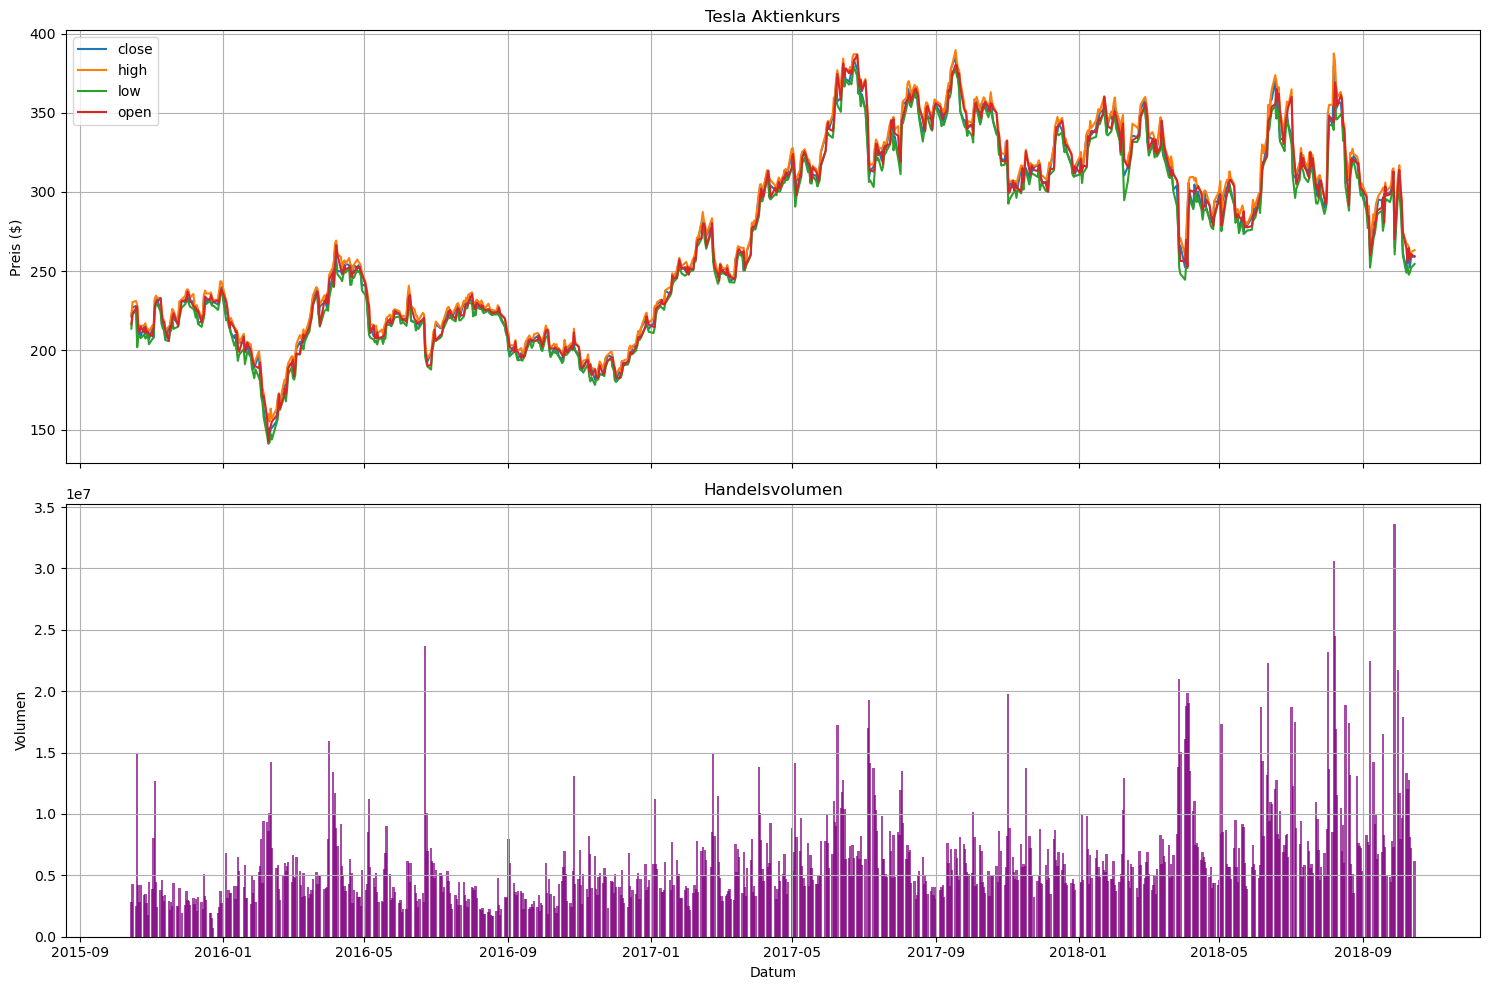

          date   close      volume    open      high     low
756 2015-10-15  221.31   2835920.0  216.43  221.7300  213.70
755 2015-10-16  227.01   4327574.0  223.04  230.4805  222.87
754 2015-10-19  228.10   2506836.0  226.50  231.1500  224.94
753 2015-10-20  213.03  14877020.0  227.72  228.6000  202.00
752 2015-10-21  210.09   4177956.0  211.99  214.8100  208.80
date      0
close     0
volume    0
open      0
high      0
low       0
dtype: int64


In [18]:
# Konvertieren Sie das Datumsformat


df['date'] = pd.to_datetime(df['date'], errors='coerce')
print(df)
df = df[(df['date'] >= '2015-10-15')& (df['date'] <= '2018-10-15')]  # Nur Daten bis 2018-10-15 behalten
df = df.sort_values('date')



df['volume'] = pd.to_numeric(df['volume'], errors='coerce')
# Erstellen Sie zwei Subplots: einen für Preise, einen für Volumen
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)


# Plot für Preisdaten
ax1.plot(df['date'], df['close'], label='close')
ax1.plot(df['date'], df['high'], label='high')
ax1.plot(df['date'], df['low'], label='low')
ax1.plot(df['date'], df['open'], label='open')
#ax1.plot(df['date'],df['volume'], label ='volume')

ax1.set_ylabel('Preis ($)')
ax1.set_title('Tesla Aktienkurs')
ax1.legend(loc='upper left')
ax1.grid(True)

# Plot für Volumendaten - separate Y-Achse
ax2.bar(df['date'], df['volume'], color='purple', alpha=0.7, width=2)  # Als Balken darstellen
ax2.set_xlabel('Datum')
ax2.set_ylabel('Volumen')
ax2.set_title('Handelsvolumen')
ax2.grid(True)

plt.tight_layout()
plt.show()
print(df.head())
print(df.isnull().sum())

<div class="alert alert-block alert-success">
&#128187; <b>Aufgabe 4:</b>
    
Splitten Sie den Datensatz in Train/Test auf.
    
</div>

In [19]:
df.dropna(inplace=True)

X = df[['open','high', 'low','volume']]
y = df['close']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=False)

<div class="alert alert-block alert-success">
&#128187; <b>Aufgabe 5:</b>
    
Visualisieren Sie den Split mit Hilfe von Matplotlib.
    
</div>

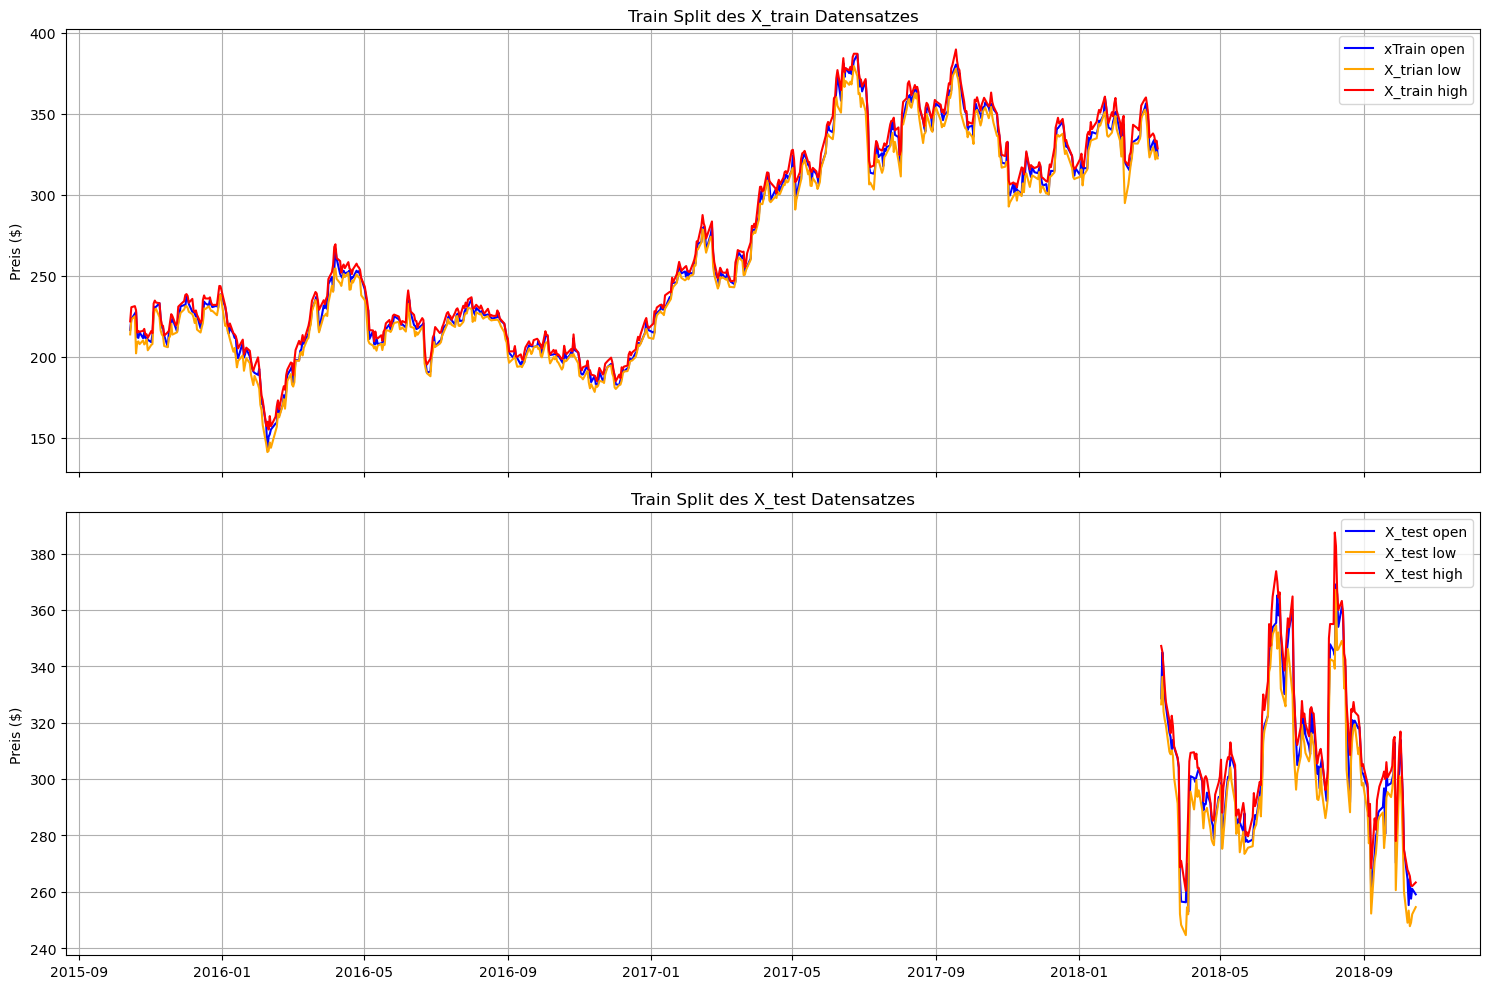

In [20]:
import matplotlib.pyplot as plt

# Die Indizes der Testdaten im Original-DataFrame bestimmen
split_index = len(X_train)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

ax1.plot(df['date'].iloc[:split_index], X_train['open'], label='xTrain open', color='blue')
ax1.plot(df['date'].iloc[:split_index], X_train['low'], label='X_trian low', color='orange')
ax1.plot(df['date'].iloc[:split_index], X_train['high'], label='X_train high', color='red')
#ax1.plot(df['date'].iloc[:split_index], X_train['volume'], label='X_train volum', color='purple')
ax1.set_ylabel('Preis ($)')
ax1.set_title('Train Split des X_train Datensatzes')   
ax1.legend()
ax1.grid(True)

ax2.plot(df['date'].iloc[split_index:], X_test['open'], label='X_test open', color='blue')
ax2.plot(df['date'].iloc[split_index:], X_test['low'], label='X_test low', color='orange')
ax2.plot(df['date'].iloc[split_index:], X_test['high'], label='X_test high', color='red')
#ax2.plot(df['date'].iloc[split_index:], X_test['volume'], label='X_test volum', color='purple')
ax2.set_ylabel('Preis ($)')
ax2.set_title('Train Split des X_test Datensatzes')   
ax2.legend()
ax2.grid(True)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
&#128187; <b>Aufgabe 6:</b>
    
Ändern Sie die Form der Trainings- und Testvektoren in Spaltenvektoren.
    
</div>

In [21]:
y_train = y_train.values.reshape(-1, 1)
y_test  = y_test.values.reshape(-1, 1)
X_train = X_train.values.reshape(-1, 4)
X_test  = X_test.values.reshape(-1, 4)

print(X_train) 
print(X_test)
print(y_train)
print(y_test)


[[2.164300e+02 2.217300e+02 2.137000e+02 2.835920e+06]
 [2.230400e+02 2.304805e+02 2.228700e+02 4.327574e+06]
 [2.265000e+02 2.311500e+02 2.249400e+02 2.506836e+06]
 ...
 [3.254400e+02 3.325000e+02 3.217400e+02 5.001940e+06]
 [3.328600e+02 3.333000e+02 3.262740e+02 3.514367e+06]
 [3.241000e+02 3.284900e+02 3.223700e+02 5.502779e+06]]
[[3.286100e+02 3.472100e+02 3.265000e+02 8.252919e+06]
 [3.449200e+02 3.451200e+02 3.362635e+02 5.960636e+06]
 [3.367600e+02 3.398100e+02 3.239300e+02 7.952152e+06]
 [3.293800e+02 3.328500e+02 3.211000e+02 6.554568e+06]
 [3.259600e+02 3.274000e+02 3.190700e+02 6.113365e+06]
 [3.165000e+02 3.207500e+02 3.096700e+02 7.467890e+06]
 [3.148700e+02 3.162500e+02 3.087600e+02 4.761031e+06]
 [3.102500e+02 3.224400e+02 3.101900e+02 5.954247e+06]
 [3.138900e+02 3.188200e+02 3.081800e+02 4.924928e+06]
 [3.112500e+02 3.116100e+02 3.004500e+02 6.639960e+06]
 [3.073400e+02 3.075900e+02 2.913600e+02 8.364937e+06]
 [3.040000e+02 3.042700e+02 2.771800e+02 1.378706e+07]
 [2.

<div class="alert alert-block alert-success">
&#128187; <b>Aufgabe 7:</b>
    
Skalieren Sie die Werte der Daten auf einen Wert zwischen 0 und 1.
    
</div>

In [22]:
from sklearn.preprocessing import MinMaxScaler

# Initialisiere separate Scaler für X und y
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

# Skalieren der Feature-Daten auf den Bereich [0, 1]
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled  = scaler_X.transform(X_test)

# Skalieren des Zielwerts (close) auf den Bereich [0, 1]
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled  = scaler_y.transform(y_test)

print(X_train_scaled)
print(X_test_scaled)
print(y_train_scaled)
print(y_test_scaled)

[[0.30326963 0.28452097 0.30487421 0.09243605]
 [0.33031878 0.32181427 0.34335592 0.15730235]
 [0.34447764 0.32466758 0.35204264 0.07812545]
 ...
 [0.74935549 0.75660586 0.75826182 0.18662794]
 [0.77971928 0.76001534 0.77728865 0.1219391 ]
 [0.743872   0.73951585 0.7609056  0.2084075 ]]
[[0.76232762 0.81929765 0.77823706 0.32800052]
 [0.82907067 0.81039039 0.81920938 0.22831794]
 [0.79567868 0.78775997 0.76745211 0.31492132]
 [0.76547858 0.75809751 0.75557607 0.25414576]
 [0.75148341 0.73487044 0.74705722 0.23495954]
 [0.71277162 0.70652915 0.70761031 0.29386263]
 [0.7061014  0.68735084 0.70379152 0.17615173]
 [0.68719565 0.71373167 0.70979248 0.22804011]
 [0.70209109 0.69830378 0.70135756 0.18327898]
 [0.6912878  0.66757586 0.66891878 0.25785913]
 [0.67528747 0.65044323 0.63077278 0.33287176]
 [0.66161968 0.6362939  0.57126671 0.56865906]
 [0.50030691 0.48461473 0.46601901 0.88068181]
 [0.46720137 0.49433132 0.44969471 0.6220331 ]
 [0.46626018 0.44903597 0.43450387 0.66894814]
 [0.521

<div class="alert alert-block alert-success">
&#128187; <b>Aufgabe 8:</b>
    
Definieren Sie eine Funktion, die die Daten in Zeitabschnitte variabler Länge für das Training aufbereitet. Für jedes Zeitintervall soll das Ergebnis zurückgegeben werden.
    
</div>

In [23]:
import numpy as np

def create_sequences(X, y, time_steps):

    X_seq = []
    y_seq = []
    
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i + time_steps])
        y_seq.append(y[i + time_steps])
    
    return np.array(X_seq), np.array(y_seq)


<div class="alert alert-block alert-success">
&#128187; <b>Aufgabe 9:</b>
    
Wenden Sie Ihre Funktion auf den Datensatz mit einem Zeitintervall von 3 an, um x_train/y_train und x_test/y_test zu erhalten.
    
</div>

In [24]:
create_sequences(X_train_scaled,y_train_scaled,3)
create_sequences(X_test_scaled,y_test_scaled,3)
print(X_train_scaled.shape)

(604, 4)


<div class="alert alert-block alert-success">
&#128187; <b>Aufgabe 10:</b>
    
Ändern Sie die Form der Daten auf `(batch, timesteps, feature)` für das simpleRNN.
    
</div>

In [25]:
# Legen Sie die gewünschte Zeitintervalldauer fest, z. B.:
time_steps = 3

# Wenden Sie die Funktion create_sequences auf die skalierten Trainings- und Testdaten an:
x_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, time_steps)
x_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, time_steps)

# Ausgabe zur Überprüfung:
print("x_train_seq shape:", x_train_seq.shape)  # Erwartet: (Anzahl_Samples - time_steps, time_steps, Anzahl_Features)
print("x_test_seq shape:", x_test_seq.shape)
print(X_train_scaled)
print(y_train_scaled)
import numpy as np

print("nan")
print(np.isnan(X_train_scaled).any())



x_train_seq shape: (601, 3, 4)
x_test_seq shape: (149, 3, 4)
[[0.30326963 0.28452097 0.30487421 0.09243605]
 [0.33031878 0.32181427 0.34335592 0.15730235]
 [0.34447764 0.32466758 0.35204264 0.07812545]
 ...
 [0.74935549 0.75660586 0.75826182 0.18662794]
 [0.77971928 0.76001534 0.77728865 0.1219391 ]
 [0.743872   0.73951585 0.7609056  0.2084075 ]]
[[0.32171715]
 [0.34533626]
 [0.3498529 ]
 [0.28740728]
 [0.2752248 ]
 [0.28197903]
 [0.27108109]
 [0.29664774]
 [0.27630216]
 [0.28711723]
 [0.2816061 ]
 [0.26213069]
 [0.2905565 ]
 [0.26801475]
 [0.36448017]
 [0.36506029]
 [0.36750508]
 [0.33837484]
 [0.30178594]
 [0.31247669]
 [0.28703435]
 [0.26320806]
 [0.29271123]
 [0.29142668]
 [0.32072266]
 [0.32374757]
 [0.31633034]
 [0.30696557]
 [0.30903742]
 [0.3562342 ]
 [0.3643973 ]
 [0.3588033 ]
 [0.38751916]
 [0.36597191]
 [0.36895537]
 [0.35930054]
 [0.36240832]
 [0.34413459]
 [0.33501844]
 [0.34558488]
 [0.30394066]
 [0.31040484]
 [0.32080554]
 [0.37641404]
 [0.37177309]
 [0.35963204]
 [0.368

<div class="alert alert-block alert-success">
&#128187; <b>Aufgabe 11:</b>
    
Definieren Sie eine simpleRNN Architektur.
    
</div>

In [26]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Initialisiere das Modell
model = Sequential()

# Die input_shape erwartet (timesteps, features)
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(x_train_seq.shape[1], x_train_seq.shape[2])))

# Füge eine Dense-Schicht als Ausgabeschicht hinzu
model.add(Dense(1))

# Ausgabe der Modellzusammenfassung zur Kontrolle
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 50)                2750      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2801 (10.94 KB)
Trainable params: 2801 (10.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<div class="alert alert-block alert-success">
&#128187; <b>Aufgabe 12:</b>
    
Kompilieren Sie das RNN mit dem adam-Optimierer und dem Mean Squared Error.
    
</div>

In [27]:
from tensorflow.keras.optimizers import Adam

#optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer='Adam', loss='mean_squared_error')

<div class="alert alert-block alert-success">
&#128187; <b>Aufgabe 13:</b>
    
Trainieren Sie mit 10 Epochen das RNN.
    
</div>

In [28]:
history = model.fit(x_train_seq, y_train_seq, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(x_test_seq, y_test_seq))

Epoch 1/10
19/19 [==============================] - 2s 21ms/step - loss: 0.1405 - val_loss: 0.0158
Epoch 2/10
19/19 [==============================] - 0s 6ms/step - loss: 0.0154 - val_loss: 0.0091
Epoch 3/10
19/19 [==============================] - 0s 6ms/step - loss: 0.0065 - val_loss: 0.0109
Epoch 4/10
19/19 [==============================] - 0s 5ms/step - loss: 0.0038 - val_loss: 0.0087
Epoch 5/10
19/19 [==============================] - 0s 6ms/step - loss: 0.0029 - val_loss: 0.0085
Epoch 6/10
19/19 [==============================] - 0s 6ms/step - loss: 0.0026 - val_loss: 0.0076
Epoch 7/10
19/19 [==============================] - 0s 5ms/step - loss: 0.0024 - val_loss: 0.0070
Epoch 8/10
19/19 [==============================] - 0s 6ms/step - loss: 0.0023 - val_loss: 0.0070
Epoch 9/10
19/19 [==============================] - 0s 6ms/step - loss: 0.0023 - val_loss: 0.0075
Epoch 10/10
19/19 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 0.0061


<div class="alert alert-block alert-success">
&#128187; <b>Aufgabe 14:</b>
    
Skalieren Sie die Vorhersage und die richtigen Werte auf den ursprünglichen Wertebereich zurück.
    
</div>

In [29]:
# Erzeuge Vorhersagen für die Testsequenzen:
y_test_pred = model.predict(x_test_seq)

# Wandle die skalierten Vorhersagen und die tatsächlichen Werte zurück in den ursprünglichen Wertebereich:
y_test_pred_unscaled = scaler_y.inverse_transform(y_test_pred)
y_test_true_unscaled = scaler_y.inverse_transform(y_test_seq)

# Ausgabe zur Überprüfung:
print("Unskalierte Vorhersagen:")
print(y_test_pred_unscaled)
print("Unskalierte tatsächliche Werte:")
print(y_test_true_unscaled)

5/5 [==============================] - 0s 3ms/step
Unskalierte Vorhersagen:
[[337.27725]
 [333.60858]
 [330.13568]
 [326.74216]
 [318.9817 ]
 [317.3448 ]
 [316.36795]
 [314.8697 ]
 [310.7446 ]
 [306.51602]
 [301.78714]
 [274.34692]
 [268.72797]
 [256.52344]
 [270.98514]
 [263.73712]
 [286.55264]
 [304.70804]
 [304.46542]
 [303.6698 ]
 [308.2151 ]
 [302.6568 ]
 [306.6617 ]
 [303.29276]
 [294.26773]
 [297.90366]
 [297.07495]
 [298.95667]
 [294.48978]
 [289.97205]
 [288.4547 ]
 [284.48788]
 [288.9086 ]
 [296.42746]
 [297.3225 ]
 [302.42676]
 [284.65698]
 [292.29123]
 [300.35764]
 [306.495  ]
 [304.5022 ]
 [309.77295]
 [308.8716 ]
 [305.43518]
 [292.76376]
 [292.2423 ]
 [290.95288]
 [284.25198]
 [290.4192 ]
 [288.60425]
 [287.3812 ]
 [283.74957]
 [281.80588]
 [282.7956 ]
 [288.98932]
 [291.23688]
 [290.88794]
 [297.97397]
 [293.39658]
 [299.49045]
 [316.93326]
 [320.20874]
 [315.5384 ]
 [327.60794]
 [340.64014]
 [342.04388]
 [344.89206]
 [347.8218 ]
 [346.912  ]
 [352.28668]
 [351.09903]
 

<div class="alert alert-block alert-success">
&#128187; <b>Aufgabe 15:</b>
    
Visualisereren Sie die Ergebnisse.
    
</div>

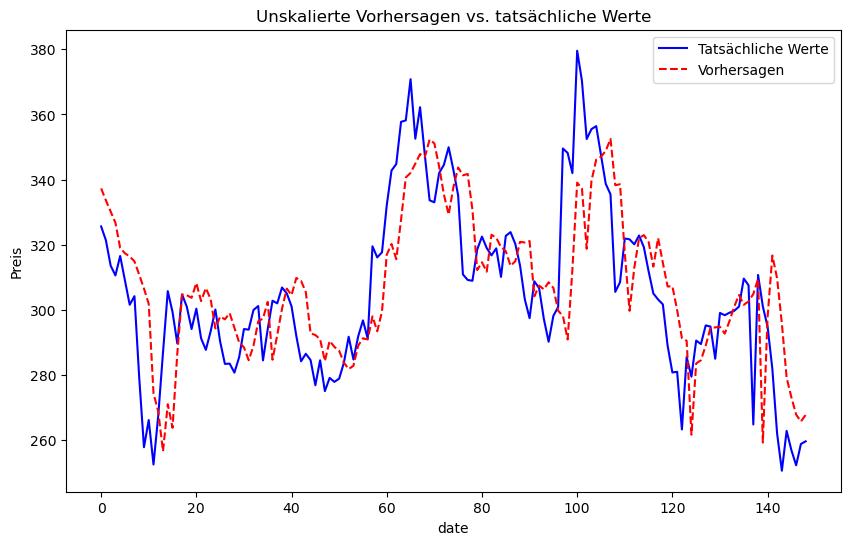

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_true_unscaled, label="Tatsächliche Werte", color="blue")
plt.plot(y_test_pred_unscaled, label="Vorhersagen", color="red", linestyle="--")
plt.title("Unskalierte Vorhersagen vs. tatsächliche Werte")
plt.xlabel("date")
plt.ylabel("Preis")
plt.legend()
plt.show()